# Load libraries

In [6]:
import os
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from keras import *

# image processing
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import img_to_array

# build your own nets
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [8]:
train_image_files_path = "/keras2production/fruits/Training/"
test_image_files_path = "/keras2production/fruits/Test/"

# Keras

https://keras.io/

In [9]:
fruit_list = ["Apricot", "Avocado", "Banana", "Clementine", "Cocos", "Kiwi", "Lemon", "Limes", 
              "Mandarine", "Orange", "Peach", "Pineapple", "Plum", "Pomegranate", "Raspberry", "Strawberry"]
output_n = len(fruit_list)
size = 20
img_width = 20
img_height = 20
channels = 3
batch_size = 32

In [21]:
train_data_gen = ImageDataGenerator(
    rescale = 1 / 255,
    validation_split=0.25
)

train_image_array_gen = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    subset='training',
    seed = 42)

valid_image_array_gen = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    subset='validation',
    seed = 42)

Found 5788 images belonging to 16 classes.
Found 1921 images belonging to 16 classes.


In [11]:
epochs = 3
train_samples = train_image_array_gen.n
valid_samples = valid_image_array_gen.n
print(train_samples, valid_samples)

5788 1921


In [12]:
model = Sequential()

# first hidden layer
model.add(Conv2D(32, (3, 3), padding = "same", input_shape = (img_width, img_height, channels)))
model.add(Activation('relu'))

# second hidden layer
model.add(Conv2D(16, (3, 3), padding = "same"))
model.add(LeakyReLU(alpha = 0.5))
model.add(BatchNormalization())

# max pooling
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# Flatten max filtered output into feature vector 
# and feed into dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Outputs from dense layer are projected onto output layer
model.add(Dense(output_n))
model.add(Activation('softmax'))

In [13]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 20, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 16)        4624      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 20, 20, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 16)        0         
__________

In [14]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = RMSprop(lr = 0.0001, decay = 1e-6),
              metrics = ['accuracy'])

In [15]:
history = model.fit_generator(
    train_image_array_gen,
    steps_per_epoch = int(train_samples / batch_size), 
    epochs = epochs, 
    validation_data = valid_image_array_gen,
    validation_steps = int(valid_samples / batch_size),
    verbose = 1
)

Epoch 1/3
180/180 [==============================] - 15s 84ms/step - loss: 1.2744 - acc: 0.5998 - val_loss: 0.2346 - val_acc: 0.9437
Epoch 2/3
180/180 [==============================] - 16s 89ms/step - loss: 0.3081 - acc: 0.9049 - val_loss: 0.0732 - val_acc: 0.9788
Epoch 3/3
180/180 [==============================] - 16s 87ms/step - loss: 0.1086 - acc: 0.9701 - val_loss: 0.0239 - val_acc: 0.9968


In [16]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


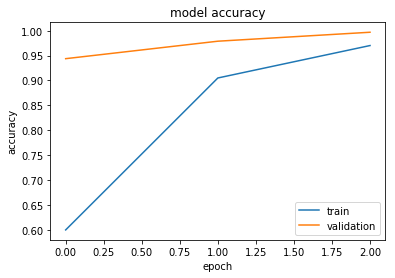

In [17]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'lower right')
plt.show()

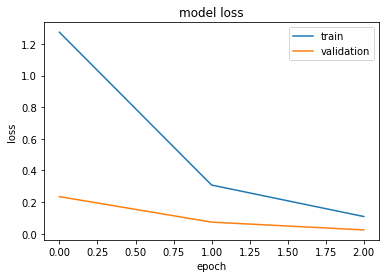

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show()

### Predict test data

In [22]:
test_data_gen = ImageDataGenerator(
    rescale = 1 / 255
)

test_image_array_gen = test_data_gen.flow_from_directory(
    test_image_files_path,
    target_size = (img_width, img_height),
    class_mode = 'categorical',
    classes = fruit_list,
    color_mode = 'rgb', 
    batch_size = batch_size,
    seed = 42)

Found 2428 images belonging to 16 classes.


In [23]:
model.evaluate_generator(test_image_array_gen,
                        steps = int(test_image_array_gen.n / batch_size))

[0.02476482456550002, 0.9966666666666667]

In [28]:
classes = train_image_array_gen.class_indices
classes

{'Apricot': 0,
 'Avocado': 1,
 'Banana': 2,
 'Clementine': 3,
 'Cocos': 4,
 'Kiwi': 5,
 'Lemon': 6,
 'Limes': 7,
 'Mandarine': 8,
 'Orange': 9,
 'Peach': 10,
 'Pineapple': 11,
 'Plum': 12,
 'Pomegranate': 13,
 'Raspberry': 14,
 'Strawberry': 15}

In [25]:
probabilities = model.predict_generator(test_image_array_gen,
                        steps = int(test_image_array_gen.n / batch_size))

In [30]:
prob_df = pd.DataFrame(probabilities, columns = classes)
prob_df.head()

Apricot       Avocado        Banana    Clementine         Cocos  \
0  4.527672e-04  5.256943e-08  4.610685e-10  2.581750e-06  5.655822e-11   
1  4.945129e-04  1.727043e-04  1.092953e-06  1.139143e-05  1.325198e-01   
2  2.379128e-12  5.791904e-11  3.814140e-08  5.170514e-11  3.418185e-04   
3  1.686732e-08  2.445047e-05  3.140443e-07  1.250319e-07  9.994320e-01   
4  2.833195e-08  5.365014e-07  5.747203e-04  1.580370e-08  1.244895e-05   

           Kiwi         Lemon         Limes     Mandarine        Orange  \
0  9.437300e-10  9.243621e-09  1.675675e-08  1.834728e-05  9.995235e-01   
1  2.487883e-04  3.991447e-07  3.675733e-09  1.343524e-06  1.101868e-08   
2  1.593160e-12  8.145572e-14  2.099053e-12  5.593135e-14  9.120172e-14   
3  2.685694e-04  3.700973e-08  4.294974e-07  1.124311e-08  7.371485e-09   
4  1.282763e-03  4.996937e-03  9.930249e-01  4.705088e-06  1.343488e-06   

          Peach     Pineapple          Plum   Pomegranate     Raspberry  \
0  2.567592e-06  5.233740e-09  2.750165e-09  1.208880e-07  4.236185e-11   
1  6.870331e-04  5.362410e-04  1.053132e-03  8.626947e-01  1.025848e-03   
2  2.038749e-11  9.931455e-07  4.082842e-06  6.809479e-06  9.996462e-01   
3  3.397043e-06  2.708951e-05  6.669878e-05  1.067764e-04  6.532998e-05   
4  6.997451e-07  8.102329e-05  6.011319e-08  4.541945e-08  1.213218e-07   

     Strawberry  
0  2.677752e-08  
1  5.529911e-04  
2  2.771229e-09  
3  4.723339e-06  
4  1.960034e-05